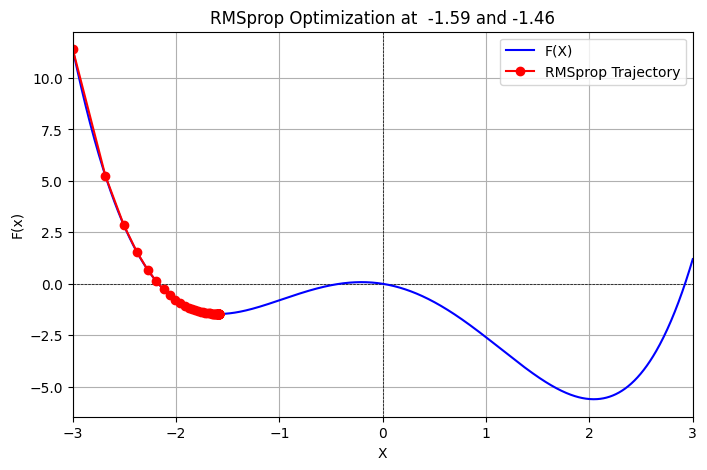

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 0.3*x**4 - 0.1*x**3 - 2*x**2 - 0.8*x 
    
def df(x):  
    return 1.2*x**3 - 0.3*x**2 - 4*x - 0.8


class RmsPropOptimizer:

    def __init__(self,x_init=-3, learningRate=0.1, iters=1000,beta=0.9, epsilon=1e-8):
        self.learningRate=learningRate
        self.iters=iters
        self.beta=beta
        self.x_init=x_init
        self.epsilon=epsilon
        self.x_min=None
        self.y_min=None
        


    def RmsProp_Calc(self):
        x_opt=[self.x_init]
        y_opt=[f(self.x_init)]
        G = 0  
        for _ in range(self.iters):
            g = df(self.x_init)  
            G = self.beta * G + (1 - self.beta) * g**2 
            self.x_init = self.x_init - (self.learningRate / np.sqrt(G + self.epsilon)) * g 
            y_result= f(self.x_init)
            x_opt.append(self.x_init)
            y_opt.append(y_result)
            
            if abs(g) < self.epsilon:  
                break
        self.x_min= self.x_init
        self.y_min= y_result
        RmsPropOptimizer.plot(self,-3,3,f,x_opt,y_opt)   
        return

    def plot(self,r_min,r_max,f,x_optim,y_optim):
        x = np.linspace(r_min, r_max, 1000)
        results = f(x)
        plt.figure(figsize=(8, 5))
        plt.title(f"RMSprop Optimization at  {np.round(self.x_min,2)} and {np.round(self.y_min,2)}")
        plt.xlabel("X")
        plt.ylabel("F(x)")
        plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
        plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
        plt.grid(True)
        plt.xlim(r_min, r_max)
        plt.plot(x, results, color="blue", label="F(X)")
        plt.plot(x_optim, y_optim, color="red",marker='o', label="RMSprop Trajectory")
        plt.legend()
        plt.show()
        return 

RmsProp=RmsPropOptimizer()
RmsProp.RmsProp_Calc()